In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv1D, MaxPooling1D, GlobalAveragePooling1D
from keras.optimizers import SGD
from keras.utils import to_categorical
from keras.models import load_model
from sklearn.model_selection import train_test_split
#import tensorflow.python.util.deprecation as deprecation
from sklearn.metrics import precision_recall_fscore_support as score
import pathlib
#deprecation._PRINT_DEPRECATION_WARNINGS = False
%matplotlib inline



### Set up tokens to download data from kaggle via api

To download manually got to https://www.kaggle.com/shayanfazeli/heartbeat

To run the below cell, enter valid user name and api key

To install kaggle run 'pip install kaggle'

In [34]:
import os
os.environ['KAGGLE_USERNAME'] = "valid-user"
os.environ['KAGGLE_KEY'] = "valid-key"
import kaggle
kaggle.api.authenticate()

pathlib.Path.cwd().joinpath('data').mkdir(parents=True, exist_ok=True)
kaggle.api.dataset_download_files('shayanfazeli/heartbeat', path='data', unzip=True)

### Read the MIT Arrhythmia Dataset

In [23]:
df = pd.read_csv('data/mitbih_train.csv')
renamed_cols = [f"col_{i}" for i,col in enumerate(df.columns)]
df.columns = renamed_cols

df_test = pd.read_csv('data/mitbih_test.csv')
renamed_cols = [f"col_{i}" for i,col in enumerate(df_test.columns)]
df_test.columns = renamed_cols

df_MIT = pd.concat([df,df_test],ignore_index=True)
df_MIT.shape

(109444, 188)

### Data Visualization and Analysis

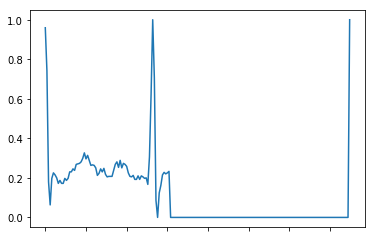

In [24]:
###Plot to see variations in each class
##change class numbers as 1.0, 0.0, 2.0,3.0, 4.0

def plotGivenClass(cls):
    df_MIT.loc[df_MIT.col_187 == cls].sample(1).iloc[0].plot()
    return

plotGivenClass(1.0)

In [126]:
df_MIT.col_187.value_counts()
#df_MIT.head(5)

0.0    90587
4.0     8039
2.0     7236
1.0     2779
3.0      803
Name: col_187, dtype: int64

In [125]:
df_MIT.describe()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_178,col_179,col_180,col_181,col_182,col_183,col_184,col_185,col_186,col_187
count,109444.000000,109444.000000,109444.000000,109444.000000,109444.000000,109444.000000,109444.000000,109444.000000,109444.000000,109444.000000,...,109444.000000,109444.000000,109444.000000,109444.000000,109444.000000,109444.000000,109444.000000,109444.000000,109444.000000,109444.000000
mean,0.891168,0.758907,0.424504,0.219604,0.201238,0.210299,0.205609,0.201619,0.198482,0.196613,...,0.004937,0.004568,0.004237,0.003914,0.003673,0.003469,0.003210,0.002956,0.002835,0.473448
std,0.239659,0.221191,0.227559,0.207248,0.177192,0.171966,0.178375,0.177021,0.171469,0.168028,...,0.043952,0.042109,0.040471,0.038801,0.037465,0.036552,0.035015,0.033414,0.032620,1.143240
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.922251,0.682642,0.251018,0.048858,0.082418,0.088300,0.073171,0.066097,0.064897,0.068627,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.991202,0.826560,0.430174,0.166355,0.147842,0.158640,0.145078,0.144465,0.150078,0.148853,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.910865,0.579832,0.342714,0.259049,0.287505,0.298343,0.295238,0.290625,0.283465,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


### Split dataset to train and test

In [67]:
x_train, x_test, y_train, y_test = train_test_split(df_MIT.iloc[:,:-1].values, df_MIT.iloc[:,-1].values, test_size = 0.3, random_state = 42)

### Create model architecture - ECG Classifier

In [68]:
num_classes=5
model_m_1 = Sequential()
model_m_1.add(Conv1D(100, 10, activation='relu', input_shape=(187,1)))

model_m_1.add(MaxPooling1D(2))
model_m_1.add(Conv1D(160, 10, activation='relu'))

model_m_1.add(MaxPooling1D(2))
model_m_1.add(Dropout(0.5))
model_m_1.add(Flatten())
model_m_1.add(Dense(num_classes, activation='softmax'))
print(model_m_1.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_53 (Conv1D)           (None, 178, 100)          1100      
_________________________________________________________________
max_pooling1d_53 (MaxPooling (None, 89, 100)           0         
_________________________________________________________________
conv1d_54 (Conv1D)           (None, 80, 160)           160160    
_________________________________________________________________
max_pooling1d_54 (MaxPooling (None, 40, 160)           0         
_________________________________________________________________
dropout_27 (Dropout)         (None, 40, 160)           0         
_________________________________________________________________
flatten_27 (Flatten)         (None, 6400)              0         
_________________________________________________________________
dense_27 (Dense)             (None, 5)                 32005     
Total para

In [69]:
### Format the data so as to get it to correct shape
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
#x_train = x_train.shape + (1,)
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1],1)

In [40]:
y_test.shape

(32834, 5)

In [71]:
## Start model training...can be skipped and model directly loaded

callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='best_model.{epoch:02d}-{val_loss:.2f}.h5',
        monitor='val_loss', save_best_only=True),
    keras.callbacks.EarlyStopping(monitor='acc', patience=1)
]

model_m_1.compile(loss='categorical_crossentropy',
                optimizer='adam', metrics=['accuracy'])

BATCH_SIZE = 250
EPOCHS = 10

history = model_m_1.fit(x_train,
                      y_train,
                      batch_size=BATCH_SIZE,
                      epochs=EPOCHS,
                      shuffle=True,
                      callbacks=callbacks_list,
                      #validation_split=0.25,
                      validation_data=(x_test, y_test),
                      verbose=1)


Train on 76610 samples, validate on 32834 samples
Epoch 1/10
76610/76610 [==============================] - 110s 1ms/step - loss: 0.1767 - acc: 0.9508 - val_loss: 0.1461 - val_acc: 0.9592
Epoch 2/10
76610/76610 [==============================] - 110s 1ms/step - loss: 0.1428 - acc: 0.9608 - val_loss: 0.1277 - val_acc: 0.9648
Epoch 3/10
76610/76610 [==============================] - 109s 1ms/step - loss: 0.1225 - acc: 0.9663 - val_loss: 0.1090 - val_acc: 0.9692
Epoch 4/10
76610/76610 [==============================] - 108s 1ms/step - loss: 0.1101 - acc: 0.9697 - val_loss: 0.0987 - val_acc: 0.9727
Epoch 5/10
76610/76610 [==============================] - 109s 1ms/step - loss: 0.1023 - acc: 0.9711 - val_loss: 0.0946 - val_acc: 0.9738
Epoch 6/10
76610/76610 [==============================] - 107s 1ms/step - loss: 0.0955 - acc: 0.9733 - val_loss: 0.0871 - val_acc: 0.9762
Epoch 7/10
76610/76610 [==============================] - 110s 1ms/step - loss: 0.0908 - acc: 0.9745 - val_loss: 0.0851 - 

In [72]:
###Save the ECG classifier model to disk
model_m_1.save("models/model_ECG_final.h5")

## Visualize Heartbeat classifier model loss and accuracy trends from training

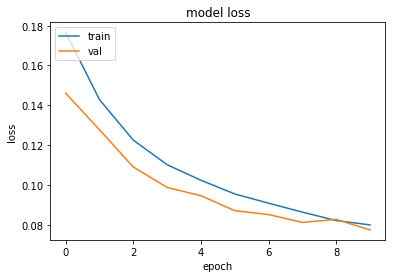

In [73]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

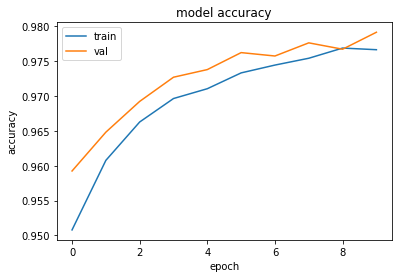

In [74]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [45]:
##View model weights
model_m.weights

[<tf.Variable 'conv1d_5/kernel:0' shape=(10, 1, 100) dtype=float32_ref>,
 <tf.Variable 'conv1d_5/bias:0' shape=(100,) dtype=float32_ref>,
 <tf.Variable 'conv1d_6/kernel:0' shape=(10, 100, 160) dtype=float32_ref>,
 <tf.Variable 'conv1d_6/bias:0' shape=(160,) dtype=float32_ref>,
 <tf.Variable 'dense_3/kernel:0' shape=(6400, 5) dtype=float32_ref>,
 <tf.Variable 'dense_3/bias:0' shape=(5,) dtype=float32_ref>]

In [31]:
model_loaded = load_model('models/model_ECG_final.h5')

In [32]:
###Test some data points

model_loaded = load_model('models/model_ECG_final.h5')
idx = [26,27]

##if previously not resphaped, run below line also
#to_pred = x_test[idx].reshape(1,x_test[idx].shape[0], x_test[idx].shape[1])

#if previously reshaped run the below line, else comment
to_pred = x_test[idx]
out_classes = model_loaded.predict(to_pred)
print(f"The actual class for the test indexes are {np.argmax(y_test[idx],axis=1)}")
print(f"The predicted classes for the test indexes are {np.argmax(out_classes, axis =1)}")


The actual class for the test indexes are [0 0]
The predicted classes for the test indexes are [0 0]


In [47]:
model_loaded.layers

In [33]:
def copyModel2Model(model_source,model_target,certain_layer=""):
    """
    Function to copy weights from one model to another model till a certain layer
    
    @param  model_source : The source model whose weight needs to be copied
    @param  model_target : The target model whose weight needs to be updated
    @param  certain_layer : The layer till which the weights to be updated in the target model
    
    @return 
    """
    for l_tg,l_sr in zip(model_target.layers,model_source.layers):
        print(l_tg.name)
        wk0=l_sr.get_weights()
        l_tg.set_weights(wk0)
        if certain_layer in l_tg.name:
            default_layer = l_tg.name
            break
    print(f"Weights from model source was copied into model target...till layer {default_layer}(excluded)") 
    return


### Read the PTB Diagnostic ECG Dataset

In [34]:
df_ptbn = pd.read_csv('data/ptbdb_normal.csv')
renamed_cols = [f"col_{i}" for i,col in enumerate(df_ptbn.columns)]
df_ptbn.columns = renamed_cols

df_ptbabn = pd.read_csv('data/ptbdb_abnormal.csv')
renamed_cols = [f"col_{i}" for i,col in enumerate(df_ptbabn.columns)]
df_ptbabn.columns = renamed_cols

df_ptb = pd.concat([df_ptbn,df_ptbabn],ignore_index=True)

### Split dataset to train and test

In [43]:
xmi_train, xmi_test, ymi_train, ymi_test = train_test_split(df_ptb.iloc[:,:-1].values, df_ptb.iloc[:,-1].values, test_size = 0.3, random_state = 42)

In [44]:
##Format data to expected shape
ymi_train = to_categorical(ymi_train)
ymi_test = to_categorical(ymi_test)
xmi_train = xmi_train.reshape(xmi_train.shape[0], xmi_train.shape[1],1)
xmi_test = xmi_test.reshape(xmi_test.shape[0], xmi_test.shape[1],1)
xmi_test.shape

(4365, 187, 1)

### Create model architecture - MI classifier

In [52]:
xmi_train.shape

(10185, 187, 1)

In [45]:
num_classes=2
model_mi = Sequential()

model_mi.add(Conv1D(100, 10, activation='relu', input_shape=(187,1)))
model_mi.add(MaxPooling1D(2))
model_mi.add(Conv1D(160, 10, activation='relu'))

model_mi.add(MaxPooling1D(2))
model_mi.add(Dropout(0.5))
model_mi.add(Flatten())
model_mi.add(Dense(num_classes, activation='softmax'))
print(model_mi.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_23 (Conv1D)           (None, 178, 100)          1100      
_________________________________________________________________
max_pooling1d_23 (MaxPooling (None, 89, 100)           0         
_________________________________________________________________
conv1d_24 (Conv1D)           (None, 80, 160)           160160    
_________________________________________________________________
max_pooling1d_24 (MaxPooling (None, 40, 160)           0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 40, 160)           0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 6400)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 2)                 12802     
Total para

### Train model with default weights

In [46]:
## Start training of the MI classifier with default weights.
from keras.optimizers import Adam
callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='best_MI_model.{epoch:02d}-{val_loss:.2f}.h5',
        monitor='val_loss', save_best_only=True),
    keras.callbacks.EarlyStopping(monitor='acc', patience=1)
]

model_mi.compile(loss='categorical_crossentropy',
                optimizer=Adam(), metrics=['accuracy'])

BATCH_SIZE = 250
EPOCHS = 10

history = model_mi.fit(xmi_train,
                      ymi_train,
                      batch_size=BATCH_SIZE,
                      epochs=EPOCHS,
                      shuffle=True,
                      callbacks=callbacks_list,
                      #validation_split=0.2,
                      validation_data=(xmi_test, ymi_test),
                      verbose=1)

Train on 10185 samples, validate on 4365 samples
Epoch 1/10
10185/10185 [==============================] - 16s 2ms/step - loss: 0.5098 - acc: 0.7387 - val_loss: 0.4410 - val_acc: 0.7954
Epoch 2/10
10185/10185 [==============================] - 16s 2ms/step - loss: 0.4188 - acc: 0.7943 - val_loss: 0.3898 - val_acc: 0.8110
Epoch 3/10
10185/10185 [==============================] - 14s 1ms/step - loss: 0.3818 - acc: 0.8199 - val_loss: 0.3528 - val_acc: 0.8474
Epoch 4/10
10185/10185 [==============================] - 14s 1ms/step - loss: 0.3515 - acc: 0.8431 - val_loss: 0.3375 - val_acc: 0.8442
Epoch 5/10
10185/10185 [==============================] - 14s 1ms/step - loss: 0.3205 - acc: 0.8613 - val_loss: 0.3095 - val_acc: 0.8603
Epoch 6/10
10185/10185 [==============================] - 14s 1ms/step - loss: 0.3094 - acc: 0.8653 - val_loss: 0.2699 - val_acc: 0.8958
Epoch 7/10
10185/10185 [==============================] - 14s 1ms/step - loss: 0.2736 - acc: 0.8887 - val_loss: 0.2694 - val_acc:

In [13]:
y_actual = np.argmax(ymi_test,axis=1)
y_pred = np.argmax(model_mi.predict(xmi_test),axis=1)
precision,recall,fscore,support=score(y_actual, y_pred,average='macro')

print ('Precision : {}'.format(precision))
print( 'Recall    : {}'.format(recall))
print ('F-score   : {}'.format(fscore))
print ('Support   : {}'.format(support))

Precision : 0.9131373466722239
Recall    : 0.9325400586240278
F-score   : 0.922041389157088
Support   : None


In [54]:
model_mi.layers

### Use the weights from ECG_Classifier

In [47]:
### Call the method to initialize the weights of the model_mi_transfer
num_classes=2
model_mi_transfer = Sequential()

model_mi_transfer.add(Conv1D(100, 10, activation='relu', input_shape=(187,1)))
model_mi_transfer.add(MaxPooling1D(2))
model_mi_transfer.add(Conv1D(160, 10, activation='relu'))

model_mi_transfer.add(MaxPooling1D(2))
model_mi_transfer.add(Dropout(0.5))
model_mi_transfer.add(Flatten())
model_mi_transfer.add(Dense(num_classes, activation='softmax'))
print(model_mi_transfer.summary())

copyModel2Model(model_loaded,model_mi_transfer,"flatten")

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_25 (Conv1D)           (None, 178, 100)          1100      
_________________________________________________________________
max_pooling1d_25 (MaxPooling (None, 89, 100)           0         
_________________________________________________________________
conv1d_26 (Conv1D)           (None, 80, 160)           160160    
_________________________________________________________________
max_pooling1d_26 (MaxPooling (None, 40, 160)           0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 40, 160)           0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 6400)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 2)                 12802     
Total para

In [48]:
### Verify if model weights are correctly copied

source_layer1_weights = model_loaded.layers[0].get_weights()
source_layer1_weights = np.array(source_layer1_weights[0])

target_layer1_weights = model_mi_transfer.layers[0].get_weights()
target_layer1_weights = np.array(target_layer1_weights[0])

print(f"Comparisson results of the two model weights compared is -> {np.allclose(source_layer1_weights, target_layer1_weights)}")

Comparisson results of the two model weights compared is -> True


In [49]:
## Start training of the MI classifier with initialized weights.
from keras.optimizers import Adam
callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='best_MI_model.{epoch:02d}-{val_loss:.2f}.h5',
        monitor='val_loss', save_best_only=True),
    keras.callbacks.EarlyStopping(monitor='acc', patience=1)
]

model_mi_transfer.compile(loss='categorical_crossentropy',
                optimizer=Adam(0.001), metrics=['accuracy'])

BATCH_SIZE = 250
EPOCHS = 10

history_transfer = model_mi_transfer.fit(xmi_train,
                      ymi_train,
                      batch_size=BATCH_SIZE,
                      epochs=EPOCHS,
                      shuffle=True,
                      callbacks=callbacks_list,
                      #validation_split=0.2,
                      validation_data=(xmi_test, ymi_test),
                      verbose=1)
y_actual = np.argmax(ymi_test,axis=1)
y_pred = np.argmax(model_mi_transfer.predict(xmi_test),axis=1)
precision,recall,fscore,support=score(y_actual, y_pred,average='macro')

print ('Precision : {}'.format(precision))
print( 'Recall    : {}'.format(recall))
print ('F-score   : {}'.format(fscore))
print ('Support   : {}'.format(support))

Train on 10185 samples, validate on 4365 samples
Epoch 1/10
10185/10185 [==============================] - 16s 2ms/step - loss: 0.4425 - acc: 0.7849 - val_loss: 0.3520 - val_acc: 0.8559
Epoch 2/10
10185/10185 [==============================] - 14s 1ms/step - loss: 0.3386 - acc: 0.8450 - val_loss: 0.2962 - val_acc: 0.8788
Epoch 3/10
10185/10185 [==============================] - 14s 1ms/step - loss: 0.2853 - acc: 0.8819 - val_loss: 0.2436 - val_acc: 0.9074
Epoch 4/10
10185/10185 [==============================] - 14s 1ms/step - loss: 0.2529 - acc: 0.8952 - val_loss: 0.2512 - val_acc: 0.8884
Epoch 5/10
10185/10185 [==============================] - 14s 1ms/step - loss: 0.2232 - acc: 0.9118 - val_loss: 0.1907 - val_acc: 0.9354
Epoch 6/10
10185/10185 [==============================] - 14s 1ms/step - loss: 0.1995 - acc: 0.9221 - val_loss: 0.1759 - val_acc: 0.9404
Epoch 7/10
10185/10185 [==============================] - 14s 1ms/step - loss: 0.1879 - acc: 0.9268 - val_loss: 0.1682 - val_acc:

### Visualize model before hyper parameter tuning

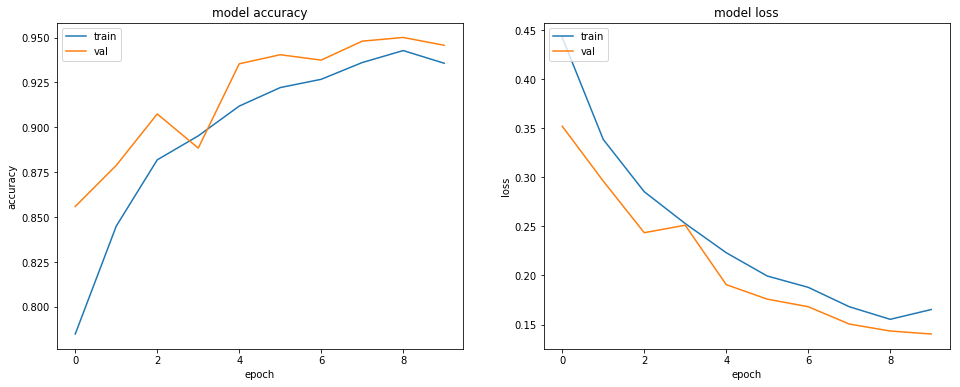

In [50]:
import matplotlib.pyplot as plt
#plt.figure(figsize=(22, 12))

fig, (ax1, ax2)  = plt.subplots(1, 2,figsize=(16,6) )

ax1.plot(history_transfer.history['acc'])
ax1.plot(history_transfer.history['val_acc'])
ax1.set_title('model accuracy')
ax1.set_ylabel('accuracy')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'val'], loc='upper left')


ax2.plot(history_transfer.history['loss'])
ax2.plot(history_transfer.history['val_loss'])
ax2.set_title('model loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend(['train', 'val'], loc='upper left')
plt.show()

In [120]:
def evaluateParams(lr_list):
    val_acc_list=[]
    metrics=[]
    for lr in lr_list:
        print(f"Start eval for {lr}")
        num_classes=2
        model_mi = Sequential()

        model_mi.add(Conv1D(100, 10, activation='relu', input_shape=(187,1)))
        model_mi.add(MaxPooling1D(2))
        model_mi.add(Conv1D(160, 10, activation='relu'))

        model_mi.add(MaxPooling1D(2))
        model_mi.add(Dropout(0.5))
        model_mi.add(Flatten())
        model_mi.add(Dense(num_classes, activation='softmax'))
        copyModel2Model(model_loaded,model_mi,"flatten")
        model_mi.compile(loss='categorical_crossentropy',optimizer=Adam(lr), metrics=['accuracy'])
    
        history = model_mi.fit(xmi_train,
                      ymi_train,
                      batch_size=BATCH_SIZE,
                      epochs=EPOCHS,
                      shuffle=True,
                      callbacks=callbacks_list,
                      #validation_split=0.2,
                      validation_data=(xmi_test, ymi_test),
                      verbose=1)
        val_acc_list.append(history.history['val_acc'][-1])
        y_actual = np.argmax(ymi_test,axis=1)
        y_pred = np.argmax(model_mi.predict(xmi_test),axis=1)
        precision,recall,fscore,support=score(y_actual, y_pred,average='macro')
        print(f"The validation accuracy -> {val_acc_list[-1]} -- The recall avg {recall}")
        print ('Precision : {}'.format(precision))
        print( 'Recall    : {}'.format(recall))
        print ('F-score   : {}'.format(fscore))
        print ('Support   : {}'.format(support))
        metrics.append(tuple([lr,precision,recall,fscore]))
    return val_acc_list,metrics

In [121]:
val_acc_list, metrics = evaluateParams([0.1,0.01,0.001])

Start eval for 0.1
conv1d_15
max_pooling1d_15
conv1d_16
max_pooling1d_16
dropout_8
flatten_8
Weights from model source was copied into model target...till layer flatten_8(excluded)
Train on 10185 samples, validate on 4365 samples
Epoch 1/10
10185/10185 [==============================] - 31s 3ms/step - loss: 4.3974 - acc: 0.7172 - val_loss: 4.5123 - val_acc: 0.7200
Epoch 2/10
10185/10185 [==============================] - 26s 3ms/step - loss: 4.4675 - acc: 0.7228 - val_loss: 4.5123 - val_acc: 0.7200
Epoch 3/10
10185/10185 [==============================] - 24s 2ms/step - loss: 4.4675 - acc: 0.7228 - val_loss: 4.5123 - val_acc: 0.7200
Epoch 4/10
10185/10185 [==============================] - 23s 2ms/step - loss: 4.4675 - acc: 0.7228 - val_loss: 4.5123 - val_acc: 0.7200
Epoch 5/10
10185/10185 [==============================] - 24s 2ms/step - loss: 4.4675 - acc: 0.7228 - val_loss: 4.5123 - val_acc: 0.7200


/opt/anaconda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


The validation accuracy -> 0.720045819110477 -- The recall avg 0.5
Precision : 0.3600229095074456
Recall    : 0.5
F-score   : 0.4186201385189131
Support   : None
Start eval for 0.01
conv1d_17
max_pooling1d_17
conv1d_18
max_pooling1d_18
dropout_9
flatten_9
Weights from model source was copied into model target...till layer flatten_9(excluded)
Train on 10185 samples, validate on 4365 samples
Epoch 1/10
10185/10185 [==============================] - 29s 3ms/step - loss: 0.4903 - acc: 0.7799 - val_loss: 0.3265 - val_acc: 0.8625
Epoch 2/10
10185/10185 [==============================] - 23s 2ms/step - loss: 0.3144 - acc: 0.8609 - val_loss: 0.2607 - val_acc: 0.8960
Epoch 3/10
10185/10185 [==============================] - 23s 2ms/step - loss: 0.2651 - acc: 0.8861 - val_loss: 0.2104 - val_acc: 0.9123
Epoch 4/10
10185/10185 [==============================] - 23s 2ms/step - loss: 0.2161 - acc: 0.9072 - val_loss: 0.1747 - val_acc: 0.9352
Epoch 5/10
10185/10185 [==============================] - 2

In [129]:
def evaluateBatchSizes(bs_list):
    val_acc_list=[]
    metrics=[]
    for bs in bs_list:
        print(f"Start eval for {bs}")
        num_classes=2
        model_mi = Sequential()

        model_mi.add(Conv1D(100, 10, activation='relu', input_shape=(187,1)))
        model_mi.add(MaxPooling1D(2))
        model_mi.add(Conv1D(160, 10, activation='relu'))

        model_mi.add(MaxPooling1D(2))
        model_mi.add(Dropout(0.5))
        model_mi.add(Flatten())
        model_mi.add(Dense(num_classes, activation='softmax'))
        copyModel2Model(model_loaded,model_mi,"flatten")
        model_mi.compile(loss='categorical_crossentropy',optimizer=Adam(0.01), metrics=['accuracy'])
    
        history = model_mi.fit(xmi_train,
                      ymi_train,
                      batch_size=bs,
                      epochs=EPOCHS,
                      shuffle=True,
                      callbacks=callbacks_list,
                      #validation_split=0.2,
                      validation_data=(xmi_test, ymi_test),
                      verbose=1)
        val_acc_list.append(history.history['val_acc'][-1])
        y_actual = np.argmax(ymi_test,axis=1)
        y_pred = np.argmax(model_mi.predict(xmi_test),axis=1)
        precision,recall,fscore,support=score(y_actual, y_pred,average='macro')
        print(f"The validation accuracy -> {val_acc_list[-1]} -- The recall avg {recall}")
        print ('Precision : {}'.format(precision))
        print( 'Recall    : {}'.format(recall))
        print ('F-score   : {}'.format(fscore))
        print ('Support   : {}'.format(support))
        metrics.append(tuple([bs,precision,recall,fscore]))
    return val_acc_list,metrics

### Visualize model with best selected parameters

In [63]:
num_classes=2
model_final = Sequential()

model_final.add(Conv1D(100, 10, activation='relu', input_shape=(187,1)))
model_final.add(MaxPooling1D(2))
model_final.add(Conv1D(160, 10, activation='relu'))

model_final.add(MaxPooling1D(2))
model_final.add(Dropout(0.5))
model_final.add(Flatten())
model_final.add(Dense(num_classes, activation='softmax'))
print(model_final.summary())

### Call the method to initialize the weights of the model_final
copyModel2Model(model_loaded,model_final,"flatten")

callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='best_MI_Final_model.{epoch:02d}-{val_loss:.2f}.h5',
        monitor='val_loss', save_best_only=True),
    keras.callbacks.EarlyStopping(monitor='acc', patience=1)
]

model_final.compile(loss='categorical_crossentropy',
                optimizer=Adam(0.002), metrics=['accuracy'])

BATCH_SIZE = 150
EPOCHS = 10

final_mod_history = model_final.fit(xmi_train,
                      ymi_train,
                      batch_size=BATCH_SIZE,
                      epochs=EPOCHS,
                      shuffle=True,
                      callbacks=callbacks_list,
                      #validation_split=0.2,
                      validation_data=(xmi_test, ymi_test),
                      verbose=1)
y_actual = np.argmax(ymi_test,axis=1)
y_pred = np.argmax(model_final.predict(xmi_test),axis=1)
precision,recall,fscore,support=score(y_actual, y_pred,average='macro')

print ('Precision : {}'.format(precision))
print( 'Recall    : {}'.format(recall))
print ('F-score   : {}'.format(fscore))
print ('Support   : {}'.format(support))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_51 (Conv1D)           (None, 178, 100)          1100      
_________________________________________________________________
max_pooling1d_51 (MaxPooling (None, 89, 100)           0         
_________________________________________________________________
conv1d_52 (Conv1D)           (None, 80, 160)           160160    
_________________________________________________________________
max_pooling1d_52 (MaxPooling (None, 40, 160)           0         
_________________________________________________________________
dropout_26 (Dropout)         (None, 40, 160)           0         
_________________________________________________________________
flatten_26 (Flatten)         (None, 6400)              0         
_________________________________________________________________
dense_26 (Dense)             (None, 2)                 12802     
Total para

## Visualize Final model training metrics

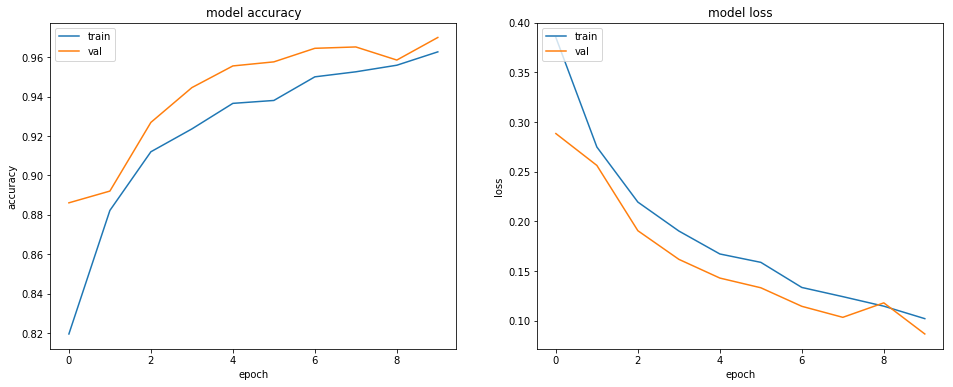

In [64]:
import matplotlib.pyplot as plt
#plt.figure(figsize=(22, 12))

fig, (ax1, ax2)  = plt.subplots(1, 2,figsize=(16,6) )

ax1.plot(final_mod_history.history['acc'])
ax1.plot(final_mod_history.history['val_acc'])
ax1.set_title('model accuracy')
ax1.set_ylabel('accuracy')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'val'], loc='upper left')


ax2.plot(final_mod_history.history['loss'])
ax2.plot(final_mod_history.history['val_loss'])
ax2.set_title('model loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend(['train', 'val'], loc='upper left')
plt.show()


### Save the trained model MI classifier

In [65]:
model_final.save("models/model_MI_final.h5")

### Evaluate model predictions

In [66]:
idx = [8,9,10, 3500]
ymi_test[idx]

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [66]:
###Test some data points
model_MI_loaded = load_model('models/model_MI_final.h5')
idx = [8,9,10, 3500]

##if previously not resphaped, run below line also
#to_pred = x_test[idx].reshape(1,x_test[idx].shape[0], x_test[idx].shape[1])

#if previously reshaped run the below line, else comment
to_pred = xmi_test[idx]
out_classes = model_MI_loaded.predict(to_pred)
print(out_classes)
MI_class = np.argmax(out_classes,axis=1)

print(f"The actual class for the test indexes are {np.argmax(ymi_test[idx],axis=1)}")
print(f"The predicted classes for the test indexes are {MI_class}")

[[1.9318869e-02 9.8068112e-01]
 [1.1597621e-03 9.9884027e-01]
 [3.2307717e-04 9.9967694e-01]
 [9.9059242e-01 9.4076209e-03]]
The actual class for the test indexes are [1 1 1 0]
The predicted classes for the test indexes are [1 1 1 0]


## Final Comments

As the data was already in format ready to be used for training there was not much of preprocessing required.

The data can be visually analyzed by plotting the readings to see some pattern emerging for the 5 heartbeat classes.

There was not a lot of variations in accuracy seen for hyperparameters changes like Batch size, learning_rate.

It was noticed an accuracy improvement with transfer learning approach as compared to the training of MI classifier from random weighs initialization.